# 📝 Evaluation Notebook

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
os.chdir("../../")

In [3]:
from lib.config import config
from lib.utils.utils import seed_everything

In [4]:
seed_everything()

## Load Prediction Data

In [5]:
df = pd.read_csv("output/microsoft/deberta-v3-base/oof_df.csv")
df.shape

(17307, 7)

## Distribution of Scores

In [6]:
fig = go.Figure(
    data=[
        go.Bar(
            x=df.score.unique(),
            y=df.score.value_counts(),
            name="Ground Truth",
        ),
        go.Bar(
            x=df.pred_score.unique(),
            y=df.pred_score.value_counts(),
            name="Prediction",
        ),
    ]
)

fig.update_layout(
    title="Bar plot<br><sup>Ground Truth vs Prediction Score</sup>",
    title_x=0.5,
)

# Show the figure
fig.show()

## Confusion Matrix

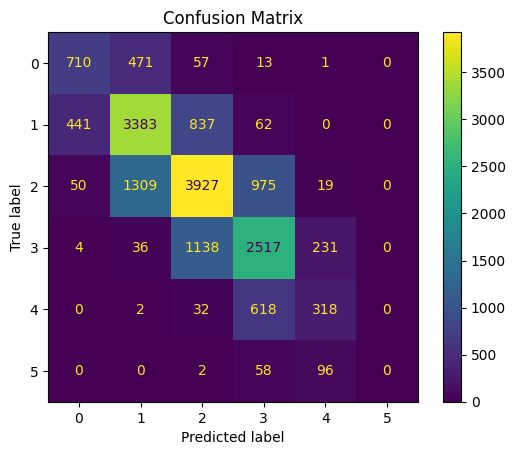

In [7]:
cm = confusion_matrix(df["score"], df["pred_score"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(config.num_classes)))

# Plot the confusion matrix
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Various Metrics

In [8]:
def init_list():
    return [0 for _ in range(config.num_classes)]

score_dict = {
    "TP": init_list(),
    "FP": init_list(),
    "TN": init_list(),
    "FN": init_list(),
    "Accuracy": init_list(),
    "Error Rate": init_list(),
    "Precision": init_list(),
    "Recall": init_list(),
    "F1 Score": init_list(),
    "Sensitivity": init_list(),
    "Specificity": init_list(),
}

for score in range(config.num_classes):
    tp = df.loc[(df.score == score) & (df.score == df.pred_score), "score"].count()
    fp = df.loc[(df.score != score) & (df.pred_score == score), "score"].count()
    tn = df.loc[(df.score != score) & (df.pred_score != score), "score"].count()
    fn = df.loc[(df.score == score) & (df.pred_score != score), "score"].count()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    sensitivity = recall
    specificity = tn / (tn + fp)

    score_dict["TP"][score] = tp
    score_dict["FP"][score] = fp
    score_dict["TN"][score] = tn
    score_dict["FN"][score] = fn
    score_dict["Accuracy"][score] = accuracy
    score_dict["Error Rate"][score] = error_rate
    score_dict["Precision"][score] = precision
    score_dict["Recall"][score] = recall
    score_dict["F1 Score"][score] = f1
    score_dict["Sensitivity"][score] = sensitivity
    score_dict["Specificity"][score] = specificity

/tmp/ipykernel_5618/130415251.py:25: RuntimeWarning:

invalid value encountered in scalar divide



In [9]:
score_df = pd.DataFrame.from_dict(score_dict)
score_df

,TP,FP,TN,FN,Accuracy,Error Rate,Precision,Recall,F1 Score,Sensitivity,Specificity
0,710,495,15560,542,0.940082,0.059918,0.589212,0.567093,0.577941,0.567093,0.969168
1,3383,1818,10766,1340,0.817530,0.182470,0.650452,0.716282,0.681782,0.716282,0.855531
2,3927,2066,8961,2353,0.744670,0.255330,0.655264,0.625318,0.639941,0.625318,0.812642
3,2517,1726,11655,1409,0.818859,0.181141,0.593212,0.641111,0.616232,0.641111,0.871011
4,318,347,15990,652,0.942278,0.057722,0.478195,0.327835,0.388991,0.327835,0.978760
5,0,0,17151,156,0.990986,0.009014,NaN,0.000000,NaN,0.000000,1.000000


### Precision, Recall, F1 Score

In [10]:
px.line(score_df, y=["Precision", "Recall", "F1 Score"])

### Sensitivity and Specificity

In [11]:
px.line(score_df, y=["Sensitivity", "Specificity"])